In [43]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, accuracy_score, f1_score

In [8]:
df = pd.read_csv("./data/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Rename columns

In [42]:
# Adding underscore to all columns names to be possible to use dor notation
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,binary_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False


In [10]:
df.shape

(1143, 13)

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,6,6,6,6,6,6,6,6,6,6,6,6
4,33,33,33,33,33,33,33,33,33,33,33,33
5,483,483,483,483,483,483,483,483,483,483,483,483
6,462,462,462,462,462,462,462,462,462,462,462,462
7,143,143,143,143,143,143,143,143,143,143,143,143
8,16,16,16,16,16,16,16,16,16,16,16,16


<BarContainer object of 6 artists>

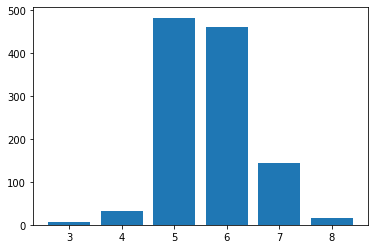

In [15]:
#unbalanced dataset
plt.bar(df.groupby('quality').count().index.values, 
        df.groupby('quality').count()['Id'].values)

In [16]:
#Creating a binary classification by grouping data into 1 if higher than 5 and 0 if not
df['binary_quality'] = df.quality > 5
#Drop Id and quality columns
df.drop(['Id', 'quality'], inplace=True, axis=1)

In [18]:
df.groupby('binary_quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
binary_quality,,,,,,,,,,,
False,522,522,522,522,522,522,522,522,522,522,522
True,621,621,621,621,621,621,621,621,621,621,621


In [19]:
# Split the model in X and y
X = df.drop(['binary_quality'], axis=1)
y = df.binary_quality

In [21]:
# Normalize model features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
# train, test, validation sets
X_train, X_vali_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_vali_test, y_valid_test, test_size=0.5, random_state=42)

### Trying different models:
* Decision Tree
* Random Forest
* AdaBoost

In [27]:
# Decision Tree
model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_valid)

In [30]:
print(classification_report(y_valid, y_pred_1))

              precision    recall  f1-score   support

       False       0.63      0.63      0.63        49
        True       0.72      0.72      0.72        65

    accuracy                           0.68       114
   macro avg       0.68      0.68      0.68       114
weighted avg       0.68      0.68      0.68       114



In [33]:
#Random Forest
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_valid)

In [34]:
print(classification_report(y_valid, y_pred_2))

              precision    recall  f1-score   support

       False       0.71      0.76      0.73        49
        True       0.81      0.77      0.79        65

    accuracy                           0.76       114
   macro avg       0.76      0.76      0.76       114
weighted avg       0.77      0.76      0.76       114



In [35]:
#AdaBoost
model_3 = AdaBoostClassifier(random_state=42)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_valid)

In [36]:
print(classification_report(y_valid, y_pred_3))

              precision    recall  f1-score   support

       False       0.72      0.67      0.69        49
        True       0.76      0.80      0.78        65

    accuracy                           0.75       114
   macro avg       0.74      0.74      0.74       114
weighted avg       0.74      0.75      0.74       114



### Test set

In [38]:
y_1 = model_1.predict(X_test)
y_2 = model_2.predict(X_test)
y_3 = model_3.predict(X_test)

In [40]:
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_1))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_2))
print("AdaBoost Accuracy: ", accuracy_score(y_test, y_3))

Decision Tree Accuracy:  0.6869565217391305
Random Forest Accuracy:  0.7739130434782608
AdaBoost Accuracy:  0.8


In [41]:
print("Decision Tree f1_score: ", f1_score(y_test, y_1))
print("Random Forest f1_score: ", f1_score(y_test, y_2))
print("AdaBoost f1_score: ", f1_score(y_test, y_3))

Decision Tree f1_score:  0.7096774193548389
Random Forest f1_score:  0.7903225806451614
AdaBoost f1_score:  0.8188976377952757


### Model saving

In [44]:
filename = "model_wine_quality.joblib"
joblib.dump(model_3, filename)

['model_wine_quality.joblib']